In [69]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns; sns.set(color_codes=True)
from sklearn.cluster import KMeans
color = sns.color_palette()
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline

In [58]:
# load the data
df = pd.read_csv('/Users/lacivert/re/data.csv')
#view the loaded data
df.describe()

RegionID  RegionName  SizeRank     1996-04     1996-05     1996-06  \
count  15282.000   15282.000 15282.000   10843.000   10974.000   10998.000   
mean   80125.483   46295.286  7641.500  123036.189  122971.396  122955.756   
std    30816.445   28934.030  4411.678   78308.265   77822.431   77728.750   
min    58196.000    1001.000     1.000   24400.000   23900.000   24200.000   
25%    66785.250   21087.750  3821.250   75700.000   75900.000   76000.000   
50%    77175.000   44306.500  7641.500  104300.000  104450.000  104500.000   
75%    88700.500   70399.500 11461.750  147100.000  147200.000  147100.000   
max   738092.000   99901.000 15282.000 1769000.000 1768100.000 1766900.000   

          1996-07     1996-08     1996-09     1996-10  ...     2016-12  \
count   11005.000   11018.000   11018.000   11018.000  ...   15232.000   
mean   122978.601  123053.295  123168.660  123334.779  ...  258309.913   
std     77712.302   77681.914   77730.936   77814.034  ...  286788.579   
min     24700.000   24700.000   25100.000   25300.000  ...   31800.000   
25%     76000.000   76200.000   76225.000   76300.000  ...  122100.000   
50%    104600.000  104900.000  105000.000  105100.000  ...  176800.000   
75%    147400.000  147475.000  147575.000  147600.000  ...  288425.000   
max   1764200.000 1762200.000 1762600.000 1763900.000  ... 6299300.000   

          2017-01     2017-02     2017-03     2017-04     2017-05     2017-06  \
count   15282.000   15282.000   15282.000   15282.000   15282.000   15282.000   
mean   259161.098  260118.846  261045.308  261971.018  262927.640  263803.226   
std    287657.252  287840.275  287918.491  288476.692  289147.943  289719.317   
min     32100.000   31900.000   31200.000   30600.000   30600.000   30900.000   
25%    122500.000  123100.000  123700.000  124100.000  124700.000  125100.000   
50%    177400.000  178300.000  179200.000  179900.000  180600.000  181300.000   
75%    289200.000  290300.000  291375.000  292300.000  293400.000  294800.000   
max   6360300.000 6336400.000 6255500.000 6294300.000 6403700.000 6468900.000   

          2017-07     2017-08     2017-09  
count   15282.000   15282.000   15282.000  
mean   264618.329  265565.816  266395.956  
std    290338.071  291066.856  291579.369  
min     31400.000   32600.000   32700.000  
25%    125600.000  126025.000  126500.000  
50%    182000.000  182500.000  183100.000  
75%    296000.000  297400.000  298750.000  
max   6489100.000 6492000.000 6475600.000  

[8 rows x 261 columns]

In [59]:
# Data clean up
df.rename(columns={"RegionName":"ZipCode"}, inplace=True)
df["ZipCode"]=df["ZipCode"].map(lambda x: "{:.0f}".format(x))
df["RegionID"]=df["RegionID"].map(lambda x: "{:.0f}".format(x))
df.head()

RegionID ZipCode      City State     Metro CountyName  SizeRank    1996-04  \
0    84654   60657   Chicago    IL   Chicago       Cook     1.000 420800.000   
1    84616   60614   Chicago    IL   Chicago       Cook     2.000 542400.000   
2    93144   79936   El Paso    TX   El Paso    El Paso     3.000  70900.000   
3    84640   60640   Chicago    IL   Chicago       Cook     4.000 298200.000   
4    61807   10467  New York    NY  New York      Bronx     5.000        nan   

     1996-05    1996-06  ...     2016-12     2017-01     2017-02     2017-03  \
0 423500.000 426200.000  ... 1097900.000 1098300.000 1094700.000 1088500.000   
1 546700.000 551700.000  ... 1522800.000 1525900.000 1525000.000 1526100.000   
2  71200.000  71100.000  ...  114200.000  114300.000  114200.000  114000.000   
3 297400.000 295300.000  ...  739400.000  743100.000  741500.000  736300.000   
4        nan        nan  ...  391600.000  388900.000  388800.000  391100.000   

      2017-04     2017-05     2017-06     2017-07     2017-08     2017-09  
0 1081200.000 1073900.000 1064300.000 1054300.000 1048500.000 1044400.000  
1 1528700.000 1526700.000 1518900.000 1515800.000 1519900.000 1525300.000  
2  113800.000  114000.000  114000.000  113800.000  113500.000  113300.000  
3  729500.000  727700.000  726000.000  718800.000  713400.000  710900.000  
4  394400.000  396900.000  398600.000  400500.000  402600.000  403700.000  

[5 rows x 265 columns]

In [ ]:
!pip uninstall -q -y plotly
!pip install -q plotly
!pip install -q --upgrade cufflinks

You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
fbprophet 0.4.post2 requires setuptools-git>=1.2, which is not installed.


In [ ]:
def enable_plotly_in_cell():
  import IPython
  from plotly.offline import init_notebook_mode
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
  '''))
  init_notebook_mode(connected=False)

In [70]:
from plotly.offline import init_notebook_mode
enable_plotly_in_cell()
init_notebook_mode(connected=False)

import cufflinks as cf
cf.go_offline()
df_comparison.iplot(title="Bay Area Median Single Family Home Prices 1996-2018",
                    xTitle="Year",
                    yTitle="Sales Price",
                   #bestfit=True, bestfit_colors=["pink"],
                   #subplots=True,
                   shape=(4,1),
                    #subplot_titles=True,
                    fill=True,)

In [63]:
sf_median = sf_df.iloc[3:]

pd.DataFrame(sf_median).to_csv("sf_median.csv")

In [64]:
df_sf_median = pd.read_csv("sf_median.csv")
df_sf_median.columns = ["Month","SF_home_price"]
df_sf_median.head()

Month  SF_home_price
0  1996-04     258100.000
1  1996-05     260850.000
2  1996-06     262750.000
3  1996-07     265000.000
4  1996-08     267100.000

In [65]:
df_sf_median['SF_home_price'] = df_sf_median['SF_home_price'].astype(np.int32)
df_sf_median['Month']= pd.to_datetime(df_sf_median['Month'], format = '%Y-%m')

In [66]:
df_sf_median.head()

Month  SF_home_price
0 1996-04-01         258100
1 1996-05-01         260850
2 1996-06-01         262750
3 1996-07-01         265000
4 1996-08-01         267100

In [67]:
df_sf_median = df_sf_median.set_index('Month')

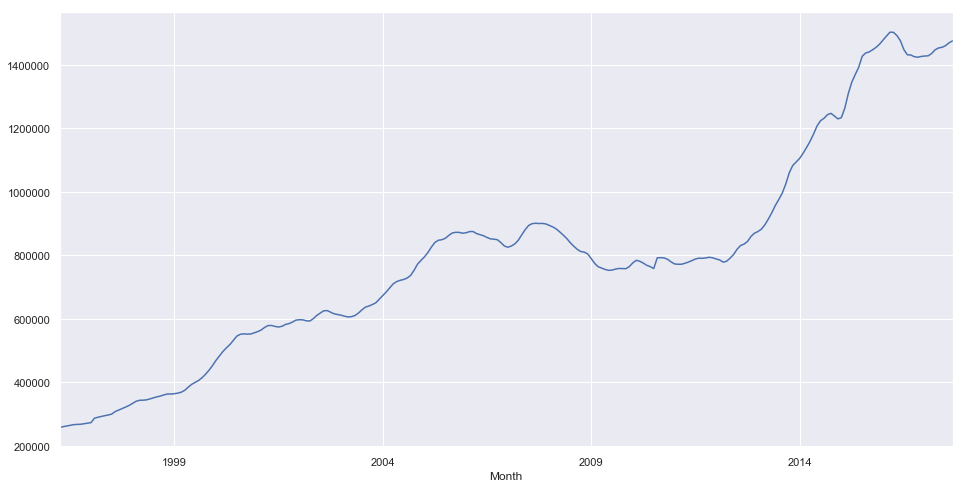

In [68]:
# ARIMA 

#Let's take a look a SF home price.
df_sf_median["SF_home_price"].plot(figsize=(16,8))

In [71]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from pylab import rcParams

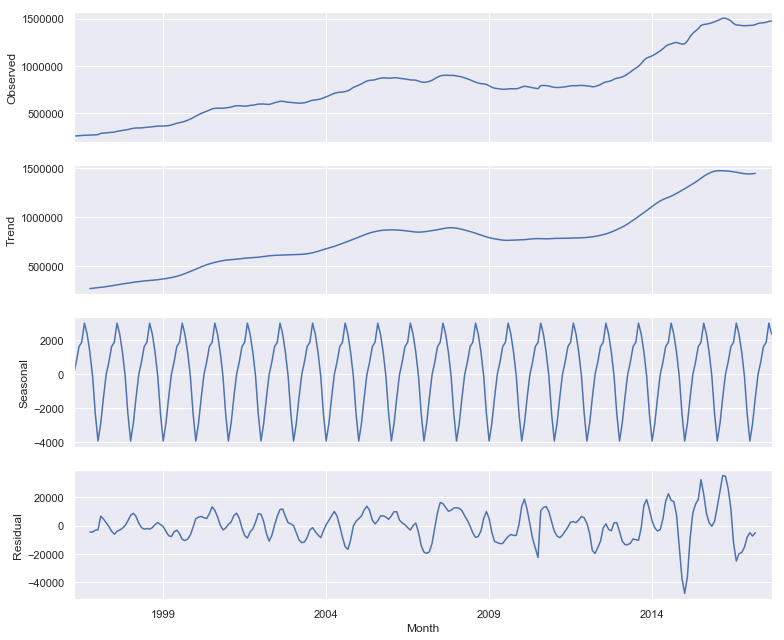

In [72]:
# Now, for decomposition...
rcParams['figure.figsize'] = 11, 9
decomposed_sf_price = sm.tsa.seasonal_decompose(df_sf_median["SF_home_price"]) # The frequncy is annual
figure = decomposed_sf_price.plot()
plt.show()

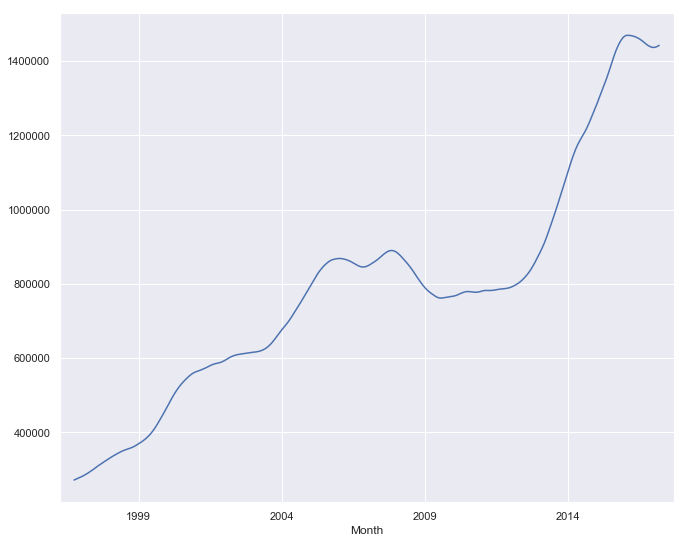

In [73]:
# The original non-stationary plot
decomposed_sf_price.trend.plot()

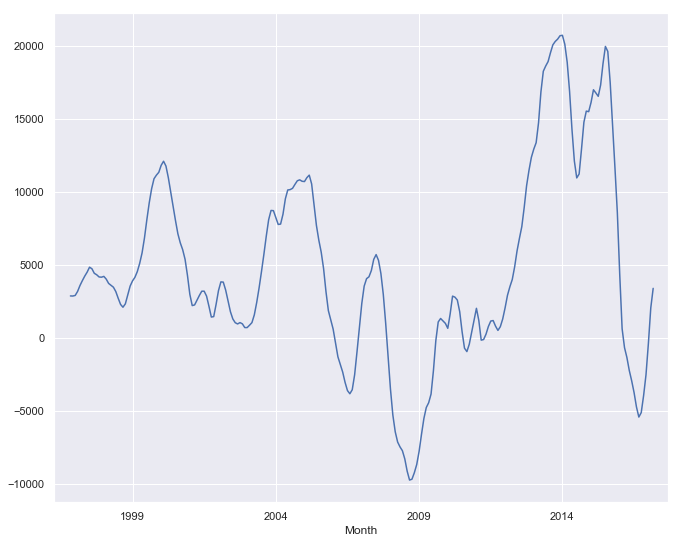

In [74]:
# The new stationary plot
decomposed_sf_price.trend.diff().plot()

In [75]:
# ARIMA variant SARIMAX
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [76]:
import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df_sf_median,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:nan
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:7243.354598282801
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:nan
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:5982.526275041254
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:6275.844054662257
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:6231.495532039172
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:5963.903951896189
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:5940.31740772611
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:7537.541490758827
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:7564.086832220766
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:6140.648359042696
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:5820.4590709095355
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:7709.287243080065
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:7558.975965087475
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:5862.49357024988
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:6240.09725011069
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:nan
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:5217.494584945838
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:5311.201665450754

In [77]:
mod = sm.tsa.statespace.SARIMAX(df_sf_median,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6963      0.066     10.593      0.000       0.567       0.825
ma.L1          0.2205      0.080      2.742      0.006       0.063       0.378
ar.S.L12      -0.3960      0.071     -5.555      0.000      -0.536      -0.256
ma.S.L12      -0.1175      0.057     -2.077      0.038      -0.228      -0.007
sigma2      6.487e+07   5.88e-10    1.1e+17      0.000    6.49e+07    6.49e+07


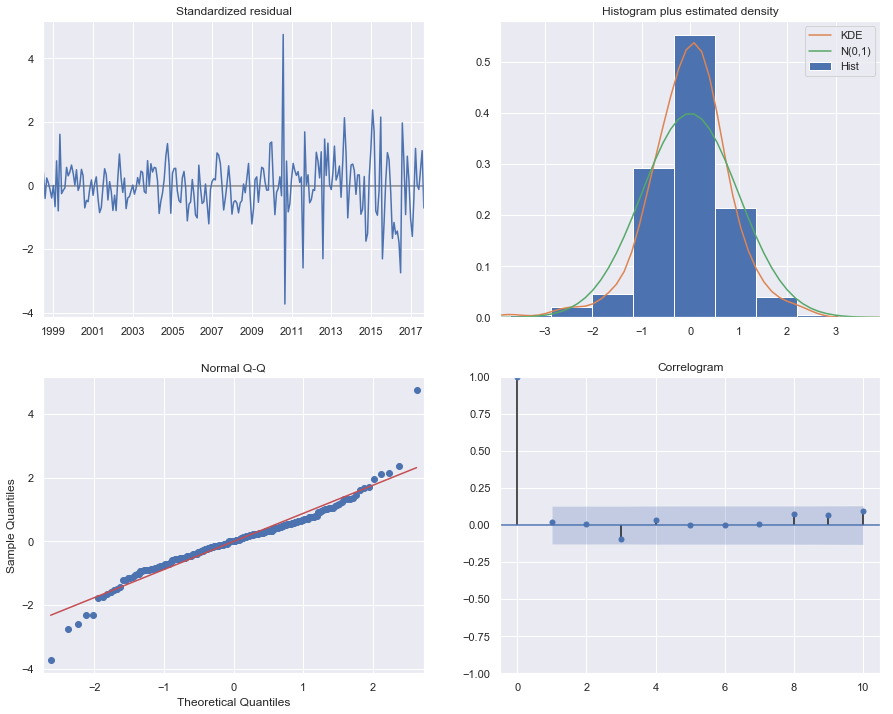

In [78]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [79]:
# validating forecasts
pred = results.get_prediction(start=pd.to_datetime('2015-01-01'), dynamic=False)
pred_ci = pred.conf_int()

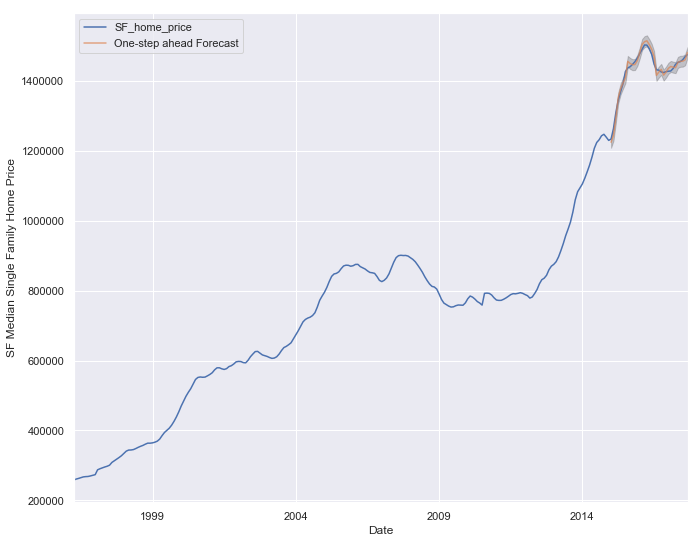

In [80]:
ax = df_sf_median['1996':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('SF Median Single Family Home Price')
plt.legend()

plt.show()

In [81]:
#not bad

In [83]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2015-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

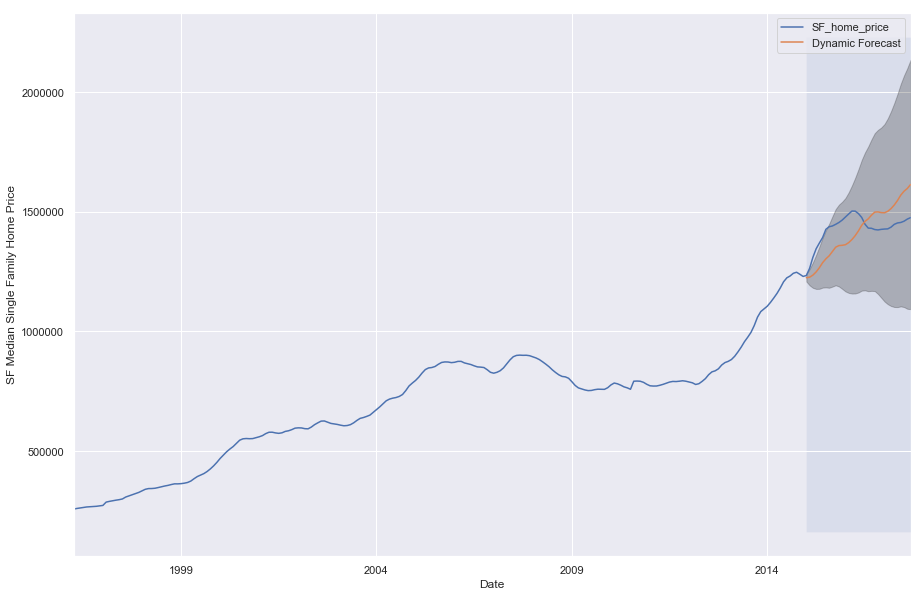

In [84]:


ax = df_sf_median['1996':].plot(label='observed', figsize=(15, 10))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2015-01-01'), df_sf_median.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('SF Median Single Family Home Price')

plt.legend()
plt.show()

In [85]:
# Get forecast 24 steps-two years-ahead in future
pred_uc = results.get_forecast(steps=24)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

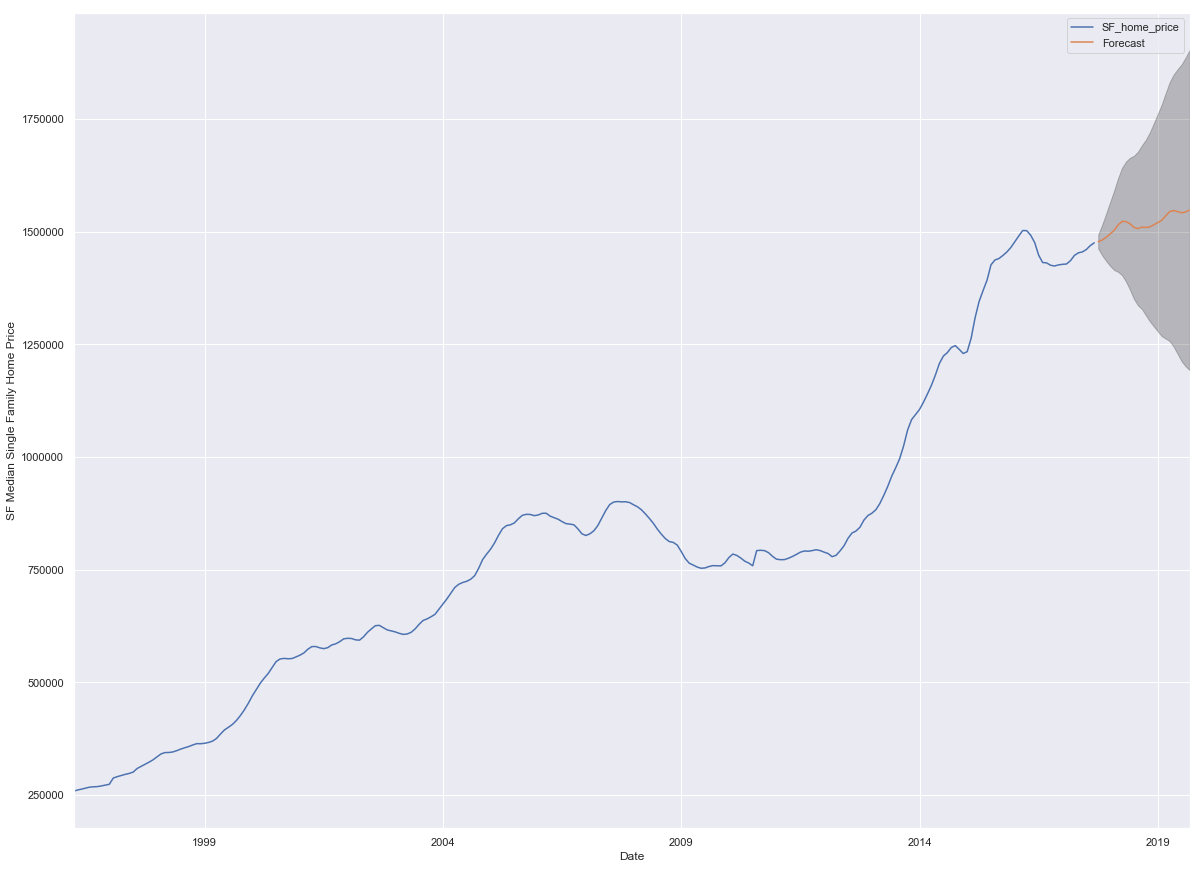

In [86]:
ax = df_sf_median.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('SF Median Single Family Home Price')

plt.legend()
plt.show()